In [35]:
from sklearn.model_selection import StratifiedKFold, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, roc_auc_score, RocCurveDisplay, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [36]:
pd.set_option('display.max_columns', None)
dfInit = pd.read_csv('../docs/stroke_data.csv', delimiter=',', encoding='utf8')
df = dfInit.copy(deep=True)
dfCopy = df.copy(deep=True)

In [37]:
X = df.drop("Stroke", axis=1)
y = df["Stroke"]
categorical_features = ["Gender", "SES", "Smoking_Status"]
numerical_features = ["Age", "BMI", "Avg_Glucose"]

In [38]:
preprocessor = ColumnTransformer(transformers=[
    ("num", StandardScaler(), numerical_features),
    ("cat", OneHotEncoder(drop="first"), categorical_features)
], remainder='passthrough')

rf_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", RandomForestClassifier(random_state=42))
])

gb_model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("classifier", GradientBoostingClassifier(random_state=42))
])

In [39]:
def base_metrics(pipeline, model_name):
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    acc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='accuracy')
    f1_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='f1')
    roc_scores = cross_val_score(pipeline, X, y, cv=cv, scoring='roc_auc')

    print(f"\n Результаты для модели: {model_name}")
    print(f"Accuracy: {np.mean(acc_scores):.4f}")
    print(f"F1 Score: {np.mean(f1_scores):.4f}")
    print(f"ROC AUC: {np.mean(roc_scores):.4f}")


    plt.figure(figsize=(8, 5))
    plt.plot(acc_scores, label="Accuracy")
    plt.plot(f1_scores, label="F1 Score")
    plt.plot(roc_scores, label="ROC AUC")
    plt.title(f"Метрики по фолдам: {model_name}")
    plt.xlabel("Fold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()


    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot(cmap="Blues")
    plt.title(f"Матрица ошибок: {model_name}")
    plt.show()


 Результаты для модели: Random Forest
Accuracy: 0.7814
F1 Score: 0.5876
ROC AUC: 0.8226


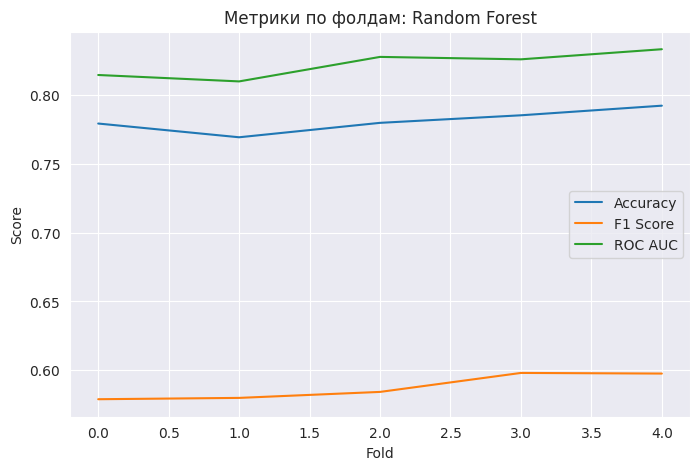

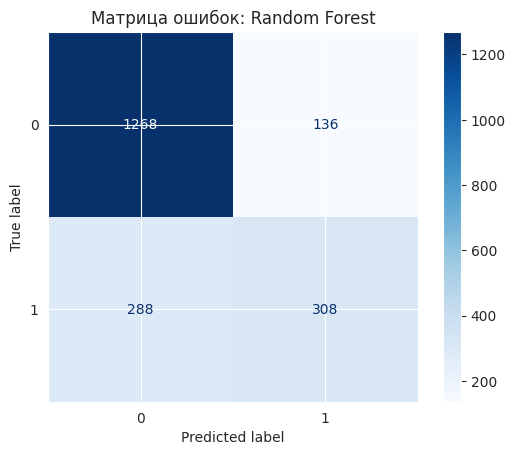


 Результаты для модели: Gradient Boosting
Accuracy: 0.8002
F1 Score: 0.6230
ROC AUC: 0.8482


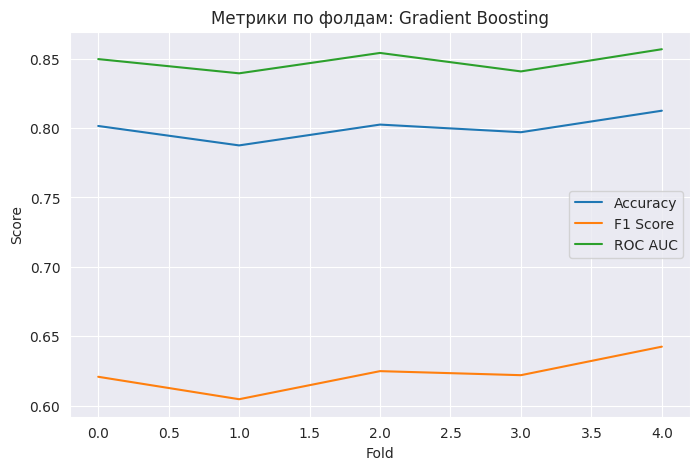

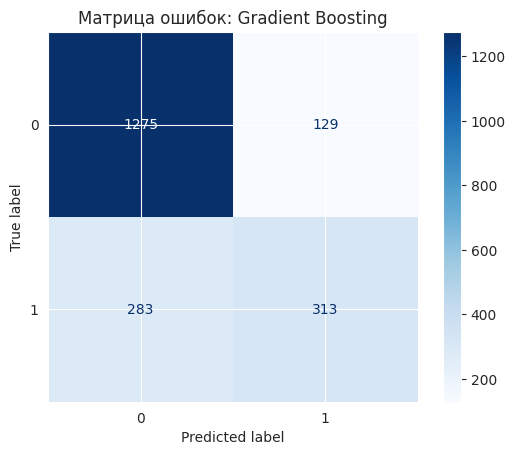

In [40]:
base_metrics(rf_model, "Random Forest")
base_metrics(gb_model, "Gradient Boosting")

In [41]:
dfCopy.dropna(inplace=True)
dfCopy = pd.get_dummies(dfCopy, drop_first=True)

X_crossval = dfCopy.drop("Stroke", axis=1)
y_crossval = dfCopy["Stroke"]

In [42]:
def hyperparameter_analysis():

    rf_range = [10, 50, 100, 150, 200]
    rf_scores = []

    for n in rf_range:
        clf = RandomForestClassifier(n_estimators=n, random_state=42)
        scores = cross_val_score(clf, X_crossval, y_crossval, cv=5, scoring='accuracy')
        rf_scores.append(np.mean(scores))
    plt.plot(rf_range, rf_scores, marker='o')
    plt.title("Accuracy vs n_estimators (Random Forest)")
    plt.xlabel("n_estimators")
    plt.ylabel("Cross-Validated Accuracy")
    plt.grid(True)
    plt.show()

    gb_range = [50, 100, 150, 200]
    gb_scores = []

    for n in gb_range:
        clf = GradientBoostingClassifier(n_estimators=n, random_state=42)
        scores = cross_val_score(clf, X_crossval, y_crossval, cv=5, scoring='accuracy')
        gb_scores.append(np.mean(scores))

    plt.plot(gb_range, gb_scores, marker='s', color='orange')
    plt.title("Accuracy vs n_estimators (Gradient Boosting)")
    plt.xlabel("n_estimators")
    plt.ylabel("Cross-Validated Accuracy")
    plt.grid(True)
    plt.show()

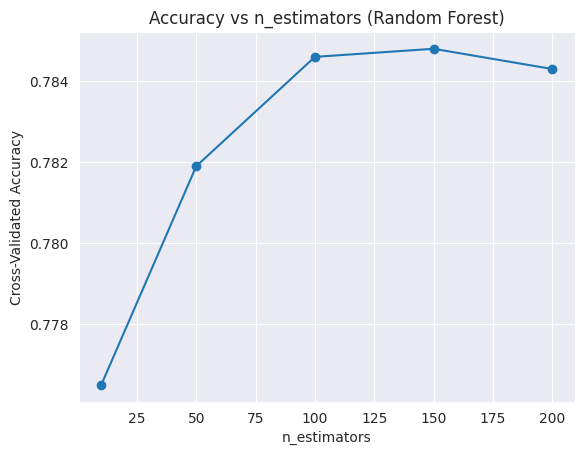

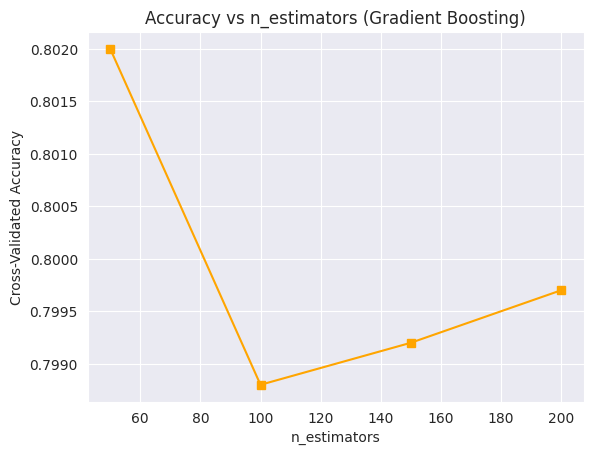

In [43]:
hyperparameter_analysis()